# <center> EA Sports : FIFA Players Performance Prediction</Center>
###### https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset?select=male_players.csv

Team members

Faiza Ayoun |Sindhu | Arjun | Syed Faraaz Ahmed

DATA 230 | Data Visualization | Fall 2023

## System Set up and Importing Libraries

In [1]:
import os

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
os.chdir("/content/gdrive/Shareddrives/Data 230/dataset_10years")

In [3]:
# upload all need libraries in this section
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# This is optional, change it at your convinience
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

## Data Collection

### Load the players dataset

In [5]:
### import the file
fifa = pd.read_csv('/content/gdrive/Shareddrives/Data 230/dataset_10years/male_players.csv')
fifa.head()

<ipython-input-5-1ec70c8969c0>:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('/content/gdrive/Shareddrives/Data 230/dataset_10years/male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

In [6]:
fifa.shape

(180021, 109)

In [7]:
fifa.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       180021 non-null  int64  
 1    player_url                      180021 non-null  object 
 2    fifa_version                    180021 non-null  float64
 3    fifa_update                     180021 non-null  float64
 4    update_as_of                    180021 non-null  object 
 5    short_name                      180021 non-null  object 
 6    long_name                       180021 non-null  object 
 7    player_positions                180021 non-null  object 
 8    overall                         180021 non-null  int64  
 9    potential                       180021 non-null  int64  
 10   value_eur                       177868 non-null  float64
 11   wage_eur                        178173 non-null  float64
 12   

In [8]:
fifa["fifa_version"].unique()

array([24., 23., 22., 21., 20., 19., 18., 17., 16., 15.])

In [9]:
fifa24 = fifa[fifa["fifa_version"]==24]
fifa24.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

In [10]:
round((fifa.isna().sum()/len(fifa) ) * 100).sort_values(ascending=False)

nation_jersey_number              94.0
club_loaned_from                  94.0
nation_team_id                    94.0
nation_position                   94.0
player_tags                       92.0
goalkeeping_speed                 89.0
player_traits                     55.0
release_clause_eur                33.0
mentality_composure               18.0
shooting                          11.0
physic                            11.0
defending                         11.0
dribbling                         11.0
pace                              11.0
passing                           11.0
club_joined_date                   7.0
league_level                       1.0
club_contract_valid_until_year     1.0
club_jersey_number                 1.0
club_position                      1.0
league_name                        1.0
club_name                          1.0
club_team_id                       1.0
wage_eur                           1.0
value_eur                          1.0
league_id                

In [11]:
fifa.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,178156.000000,178156.000000,177771.000000,178156.000000,178156.000000,180021.000000,10098.000000,10098.000000,180021.000000,180021.000000,180021.000000,1.207220e+05,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,45263.728210,221.747991,1.380878,20.302297,2020.816015,55.657218,29845.186671,12.226580,2.939657,2.335689,1.105171,4.878321e+06,68.058839,52.268155,56.995731,62.160484,51.232742,64.824322,49.622605,45.687803,52.205720,58.434510,42.974686,55.296321,47.351876,43.028008,52.709312,58.251404,64.695080,64.866871,63.383000,61.588059,63.951445,56.812672,65.023120,63.068586,65.128474,47.101505,55.714289,46.617700,50.047078,53.187567,48.579993,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,53516.528046,467.804515,0.750647,17.054347,2.902942,48.050844,47980.430480,6.911397,0.664775,0.754452,0.381699,1.271795e+07,11.063818,13.920686,10.427677,10.220788,16.580676,9.755666,17.985783,19.281183,17.146296,14.651313,17.449400,18.614112,18.059794,17.196317,15.172114,16.576721,14.789598,14.543439,14.725512,9.144995,14.082868,15.290486,11.898887,15.875722,12.615282,19.051298,17.176139,20.414351,19.231630,14.193916,15.660671,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,974.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+03,21.000000,14.000000,20.000000,22.000000,14.000000,27.000000,5.000000,2.000000,4.000000,7.000000,3.000000,2.000000,4.000000,3.000000,5.000000,5.000000,11.000000,11.000000,11.000000,20.000000,10.000000,2.000000,13.000000,10.000000,12.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,450.000000,19.000000,1.000000,8.000000,2019.000000,21.000000,1343.000000,6.000000,3.000000,2.0

In [12]:
fifa.describe(include=['object'])

,player_url,update_as_of,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined_date,nationality_name,nation_position,preferred_foot,work_rate,body_type,real_face,player_tags,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,180021,180021,180021,180021,180021,180021,178156,178156,178156,10723,167433,180021,10098,180021,180021,180021,180021,13918,81805,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021,180021
unique,180021,10,47272,52892,2031,9546,1082,42,29,831,4417,188,29,2,9,10,2,204,5208,401,401,401,340,310,310,310,340,441,441,441,422,390,390,390,422,399,429,429,429,399,393,475,475,475,393,297
top,/player/231747/kylian-mbappe/240002,2021-09-23,J. Rodríguez,Danny Ward,CB,1992-02-29,Everton,Premier League,SUB,Atalanta,2017-07-01,England,SUB,Right,Medium/Medium,Normal (170-185),No,#Strength,Speed Dribbler (AI),60+2,60+2,60+2,64,62,62,62,64,62+2,62+2,62+2,62+2,60+2,60+2,60+2,62+2,60+2,61+2,61+2,61+2,60+2,62+2,63+2,63+2,63+2,62+2,16+2
freq,1,19239,90,20,22479,1065,444,9371,77123,145,4411,16415,5217,137660,98366,63022,163565,4714,4442,3510,3510,3510,7013,7055,7055,7055,7013,3746,3746,3746,3702,3827,3827,3827,3702,3524,3160,3160,3160,3524,3531,2650,2650,2650,3531,18568


In [13]:
len(fifa['player_id'].unique())

53111

In [14]:
# Checking that id is unique for players
fifa[fifa['player_id'] == 158023]

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
18351,158023,/player/158023/lionel-messi/230002,23.0,2.0,2022-09-26,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,54000000.0,195000.0,35,1987-06-24,169,67,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,99900000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",81.0,89.0,90.0,94.0,34.0,64.0,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96.0,20,35,24,6,11,15,14,8,NaN,87+3,87+3,87+3,90,91,91,91,90,92-1,92-1,92-1,89+2,85+3,85+3,85+3,89+2,64+3,63+3,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3
36883,158023,https://sofifa.com/player/158023/lionel-messi/...,22.0,2.0,2021-09-23,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
56122,158023,https://sofifa.com/player/158023/lionel-messi/...,21.0,2.0,2020-09-23,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,241.0,FC Barcelona,53.0,La Liga,1.0,CAM,10.0,NaN,2004-07-01,2021.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,32,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,9

In [15]:
len(fifa['nationality_name'].unique())

188

In [16]:
fifa['nationality_name'].unique()

array(['France', 'Norway', 'Belgium', 'Argentina', 'Poland', 'England',
       'Brazil', 'Spain', 'Portugal', 'Germany', 'Netherlands', 'Egypt',
       'Uruguay', 'Nigeria', 'Slovenia', 'Italy', 'Switzerland',
       'Croatia', 'Korea Republic', 'Georgia', 'Algeria', 'Senegal',
       'Scotland', 'Serbia', 'Cameroon', 'Costa Rica', 'Austria',
       'Turkey', 'Morocco', 'Ghana', 'Denmark', 'Colombia', 'Hungary',
       'Slovakia', 'Canada', 'Czech Republic', 'Bosnia and Herzegovina',
       "Côte d'Ivoire", 'Ukraine', 'Montenegro', 'Iran', 'Sweden',
       'Burkina Faso', 'Mexico', 'Greece', 'Tunisia', 'Japan', 'Libya',
       'Chile', 'Finland', 'Armenia', 'Central African Republic',
       'Paraguay', 'Mozambique', 'Kosovo', 'North Macedonia', 'Ecuador',
       'Congo DR', 'Gabon', 'Mali', 'United States', 'Jamaica', 'Russia',
       'Malta', 'Peru', 'Angola', 'Australia', 'Guinea', 'Suriname',
       'Togo', 'Albania', 'Gambia', 'Israel', 'Trinidad and Tobago',
       'Zimbabwe', 'W

### Scrapping data from a Countries/continents webpage

In [17]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [18]:
# Create an URL object
url = 'https://www.geonames.org/countries/'
# Create object page
page = requests.get(url)

In [19]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')


In [20]:
# Obtain information from tag <table>
table1 = soup.find('table', id='countries')

In [21]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title)

In [22]:
headers

['ISO-3166alpha2',
 'ISO-3166alpha3',
 'ISO-3166numeric',
 'fips',
 'Country',
 'Capital',
 'Area in km²',
 'Population',
 'Continent']

In [23]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [24]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [25]:
mydata.head()

,ISO-3166alpha2,ISO-3166alpha3,ISO-3166numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,020,AN,Andorra,Andorra la Vella,468.0,"77,006",EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,"82,880.0","9,630,959",AS
2,AF,AFG,004,AF,Afghanistan,Kabul,"647,500.0","37,172,386",AS
3,AG,ATG,028,AC,Antigua and Barbuda,St. John's,443.0,"96,286",NA
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,"13,254",NA


## Cleaning the Data

### Choosing first positin from list in column

In [26]:
fifa['player_positions'] = fifa['player_positions'].str.split().str[0]
fifa['player_positions'] = fifa['player_positions'].str.replace(',', '').str.split().str[0]
fifa.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,ST,91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,CM,91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,CF,90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/playe

In [27]:
unique_values = fifa['player_positions'].unique()
print(unique_values)

['ST' 'CM' 'CF' 'GK' 'LW' 'CDM' 'CB' 'RW' 'CAM' 'RB' 'RM' 'LB' 'LM' 'LWB'
 'RWB']


### outliers

In [ ]:
# Finding Threshholds from each numeric feature
def find_thresholds (data):
    table=pd.DataFrame(columns = data.select_dtypes(include=['int64','float64']).columns, index = ["Q1", "Q3","IQR", 'min', "max", "lower treshold", "upper treshold"])
    for col in data.select_dtypes(include=['int64','float64']).columns :
        Q1 = data[col].quantile(q=0.25)
        Q3 = data[col].quantile(q=0.75)
        IQR = Q3-Q1
        table.loc["Q1"][col] = Q1
        table.loc["Q3"][col] = Q3
        table.loc["IQR"][col] = IQR
        table.loc['min'][col]= data[col].min()
        table.loc["max"][col]= data[col].max()
        table.loc["lower treshold"][col]= Q1-(3)*IQR
        table.loc["upper treshold"][col]= Q3+(3)*IQR
    return table

In [ ]:
threshholds = find_thresholds(fifa)
threshholds

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
Q1,200759.0,17.0,2.0,61.0,66.0,325000.0,2000.0,21.0,176.0,70.0,450.0,19.0,1.0,8.0,2019.0,21.0,1343.0,6.0,3.0,2.0,1.0,633250.0,62.0,42.0,50.0,56.0,36.0,58.0,38.0,30.0,44.0,53.0,30.0,48.0,35.0,31.0,43.0,54.0,57.0,57.0,55.0,55.0,56.0,47.0,58.0,56.0,58.0,32.0,44.0,26.0,39.0,44.0,39.0,50.0,26.0,27.0,25.0,8.0,8.0,8.0,8.0,8.0,30.0
Q3,239858.0,22.0,2.0,70.0,75.0,1800000.0,10000.0,28.0,186.0,80.0,110912.0,308.0,2.0,27.0,2023.0,56.0,105035.0,18.0,3.0,3.0,1.0,3600000.0,76.0,63.0,64.0,69.0,64.0,72.0,63.0,62.0,64.0,68.0,56.0,68.0,61.0,56.0,64.0,69.0,75.0,75.0,74.0,68.0,74.0,68.0,73.0,74.0,74.0,62.0,69.0,64.0,64.0,64.0,60.0,66.0,63.0,66.0,64.0,14.0,14.0,14.0,14.0,14.0,46.0
IQR,39099.0,5.0,0.0,9.0,9.0,1475000.0,8000.0,7.0,10.0,10.0,110462.0,289.0,1.0,19.0,4.0,35.0,103692.0,12.0,0.0,1.0,0.0,2966750.0,14.0,21.0,14.0,13.0,28.0,14.0,25.0,32.0,20.0,15.0,26.0,20.0,26.0,25.0,21.0,15.0,18.0,18.0,19.0,13.0,18.0,21.0,15.0,18.0,16.0,30.0,25.0,38.0,25.0,20.0,21.0,16.0,37.0,39.0,39.0,6.0,6.0,6.0,6.0,6.0,16.0
min,2,15.0,2.0,40,40,1000.0,500.0,16,154,49,1.0,1.0,1.0,1.0,2014.0,1,974.0,1.0,1,1,1,9000.0,21.0,14.0,20.0,22.0,14.0,27.0,5,2,4,7,3,2,4,3,5,5,11,11,11,20,10,2,13,10,12,3,2,3,2,3,5,3.0,1,2,3,1,1,1,1,1,12.0
max,278145,24.0,2.0,94,95,194000000.0,575000.0,54,208,110,131389.0,2149.0,5.0,99.0,2032.0,219,111527.0,97.0,5,5,5,373500000.0,97.0,94.0,94.0,96.0,91.0,92.0,95,96,95,95,93,97,94,95,95,96,97,97,96,96,97,96,97,97,98,94,96,93,96,96,96,96.0,94,94,95,91,92,95,92,94,68.0
lower treshold,83462.0,2.0,2.0,34.0,39.0,-4100000.0,-22000.0,0.0,146.0,40.0,-330936.0,-848.0,-2.0,-49.0,2007.0,-84.0,-309733.0,-30.0,3.0,-1.0,1.0,-8267000.0,20.0,-21.0,8.0,17.0,-48.0,16.0,-37.0,-66.0,-16.0,8.0,-48.0,-12.0,-43.0,-44.0,-20.0,9.0,3.0,3.0,-2.0,16.0,2.0,-16.0,13.0,2.0,10.0,-58.0,-31.0,-88.0,-36.0,-16.0,-24.0,2.0,-85.0,-90.0,-92.0,-10.0,-10.0,-10.0,-10.0,-10.0,-18.0
upper treshold,357155.0,37.0,2.0,97.0,102.0,6225000.0,34000.0,49.0,216.0,110.0,442298.0,1175.0,5.0,84.0,2035.0,161.0,416111.0,54.0,3.0,6.0,1.0,12500250.0,118.0,126.0,106.0,108.0,148.0,114.0,138.0,158.0,124.0,113.0,134.0,128.0,139.0,131.0,127.0,114.0,129.0,129.0,131.0,107.0,128.0,131.0,118.0,128.0,122.0,152.0,144.0,178.0,139.0,124.0,123.0,114.0,174.0,183.0,181.0,32.0,32.0,32.0,32.0,32.0,94.0


In [ ]:
fifa[fifa.value_eur>6225000.0].shape

(14586, 109)

In [ ]:
fifa = fifa[fifa.value_eur<6225000.0]

In [ ]:
fifa[fifa.age>45].shape

(2, 109)

### Change Countries with New Name

In [28]:
for country in fifa['nationality_name'].unique():
    if country not in mydata.Country.unique():
        print(country)

England
Netherlands
Korea Republic
Scotland
Czech Republic
Côte d'Ivoire
Congo DR
Gambia
Wales
Republic of Ireland
China PR
Cape Verde Islands
Guinea Bissau
Northern Ireland
Congo
Curacao
Chinese Taipei
Saint Kitts and Nevis
Korea DPR
São Tomé e Príncipe
Macau
Swaziland
Brunei Darussalam
Saint Vincent and the Grenadines


In [29]:
fifa['nationality_name']= fifa['nationality_name'].replace(['England'],'United Kingdom')
fifa['nationality_name']= fifa['nationality_name'].replace(['Korea Republic'],'South Korea')
fifa['nationality_name']= fifa['nationality_name'].replace(['Scotland'],'United Kingdom')
fifa['nationality_name']= fifa['nationality_name'].replace(['Czech Republic'],'Czechia')
fifa['nationality_name']= fifa['nationality_name'].replace(["Côte d'Ivoire"],'Ivory Coast')
fifa['nationality_name']= fifa['nationality_name'].replace(['Congo DR'],'DR Congo')
fifa['nationality_name']= fifa['nationality_name'].replace(['Gambia'],'The Gambia')
fifa['nationality_name']= fifa['nationality_name'].replace(['Wales'],'United Kingdom')
fifa['nationality_name']= fifa['nationality_name'].replace(['Republic of Ireland'],'Ireland')
fifa['nationality_name']= fifa['nationality_name'].replace(['China PR'],'China')
fifa['nationality_name']= fifa['nationality_name'].replace(['Cape Verde Islands'],'Cabo Verde')
fifa['nationality_name']= fifa['nationality_name'].replace(['Guinea Bissau'],'Guinea-Bissau')
fifa['nationality_name']= fifa['nationality_name'].replace(['Northern Ireland'],'United Kingdom')
fifa['nationality_name']= fifa['nationality_name'].replace(['Congo'],'Congo Republic')
fifa['nationality_name']= fifa['nationality_name'].replace(['Curacao'],'Curaçao')
fifa['nationality_name']= fifa['nationality_name'].replace(['Chinese Taipei'],'Taiwan')
fifa['nationality_name']= fifa['nationality_name'].replace(['Saint Kitts and Nevis'],'St Kitts and Nevis')
fifa['nationality_name']= fifa['nationality_name'].replace(['Korea DPR'],'North Korea')
fifa['nationality_name']= fifa['nationality_name'].replace(['São Tomé e Príncipe'],'São Tomé and Príncipe')
fifa['nationality_name']= fifa['nationality_name'].replace(['Macau'],'Macao')
fifa['nationality_name']= fifa['nationality_name'].replace(['Swaziland'],'Eswatini')
fifa['nationality_name']= fifa['nationality_name'].replace(['Brunei Darussalam'],'Brunei')
fifa['nationality_name']= fifa['nationality_name'].replace(['Saint Vincent and the Grenadines'],'St Vincent and Grenadines')
fifa['nationality_name']= fifa['nationality_name'].replace(['Netherlands'],'The Netherlands')


In [30]:
for country in fifa['nationality_name'].unique():
    if country not in mydata.Country.unique():
        print(country)

### Removing unwanted columns including columns with high rate of null values

In [31]:
# Define a list of unwanted columns
unwanted_columns = [
    'player_url', 'fifa_update', 'update_as_of', 'dob', 'club_team_id', 'league_id',
    'league_level', 'nation_team_id', 'nation_position', 'nation_jersey_number',
     'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
    'work_rate', 'body_type', 'real_face',
    'nation_team_id', 'nation_jersey_number', 'club_loaned_from', 'player_tags', 'goalkeeping_speed', 'player_traits', 'club_joined_date', 'release_clause_eur'
]

# Drop the unwanted columns from the DataFrame
fifa = fifa.drop(unwanted_columns, axis=1)


### Check data again

In [32]:
fifa.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   player_id                       180021 non-null  int64  
 1   fifa_version                    180021 non-null  float64
 2   short_name                      180021 non-null  object 
 3   long_name                       180021 non-null  object 
 4   player_positions                180021 non-null  object 
 5   overall                         180021 non-null  int64  
 6   potential                       180021 non-null  int64  
 7   value_eur                       177868 non-null  float64
 8   wage_eur                        178173 non-null  float64
 9   age                             180021 non-null  int64  
 10  height_cm                       180021 non-null  int64  
 11  weight_kg                       180021 non-null  int64  
 12  club_name       

In [33]:
round((fifa.isna().sum()/len(fifa) ) * 100).sort_values(ascending=False)

defending                         11.0
dribbling                         11.0
passing                           11.0
shooting                          11.0
pace                              11.0
physic                            11.0
club_name                          1.0
club_contract_valid_until_year     1.0
club_jersey_number                 1.0
league_name                        1.0
club_position                      1.0
wage_eur                           1.0
value_eur                          1.0
cf                                 0.0
ram                                0.0
power_stamina                      0.0
power_strength                     0.0
ls                                 0.0
st                                 0.0
lm                                 0.0
lam                                0.0
cam                                0.0
lf                                 0.0
rw                                 0.0
rf                                 0.0
rs                       

###Handling Null Values

In [34]:
#Computing missing values using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['defending'].mean()
fifa.defending.fillna(fifa[fifa.defending.isna()].apply(func,axis=1), inplace=True)

In [35]:
#Computing missing values using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['physic'].mean()
fifa.physic.fillna(fifa[fifa.physic.isna()].apply(func,axis=1), inplace=True)

In [36]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['shooting'].mean()
fifa.shooting.fillna(fifa[fifa.shooting.isna()].apply(func,axis=1), inplace=True)

In [37]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['passing'].mean()
fifa.passing.fillna(fifa[fifa.passing.isna()].apply(func,axis=1), inplace=True)

In [38]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['dribbling'].mean()
fifa.dribbling.fillna(fifa[fifa.dribbling.isna()].apply(func,axis=1), inplace=True)

In [39]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['pace'].mean()
fifa.pace.fillna(fifa[fifa.pace.isna()].apply(func,axis=1), inplace=True)

In [40]:
fifa.pace.info()

<class 'pandas.core.series.Series'>
RangeIndex: 180021 entries, 0 to 180020
Series name: pace
Non-Null Count   Dtype  
--------------   -----  
180021 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [41]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['value_eur'].mean()
fifa.value_eur.fillna(fifa[fifa.value_eur.isna()].apply(func,axis=1), inplace=True)

In [42]:
fifa.value_eur.info()

<class 'pandas.core.series.Series'>
RangeIndex: 180021 entries, 0 to 180020
Series name: value_eur
Non-Null Count   Dtype  
--------------   -----  
180021 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [43]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['defending'].mean()
fifa.defending.fillna(fifa[fifa.defending.isna()].apply(func,axis=1), inplace=True)

In [44]:
fifa.defending.info()

<class 'pandas.core.series.Series'>
RangeIndex: 180021 entries, 0 to 180020
Series name: defending
Non-Null Count   Dtype  
--------------   -----  
180021 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [45]:
#Computing mean using overall rating
def func(row):
  return fifa[fifa.overall==row['overall']]['wage_eur'].mean()
fifa.wage_eur.fillna(fifa[fifa.wage_eur.isna()].apply(func,axis=1), inplace=True)

In [46]:
fifa.wage_eur.info()

<class 'pandas.core.series.Series'>
RangeIndex: 180021 entries, 0 to 180020
Series name: wage_eur
Non-Null Count   Dtype  
--------------   -----  
180021 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [47]:
Percentage_of_na=round((fifa.isna().sum()/len(fifa) ) * 100).sort_values(ascending=False)

In [48]:
Percentage_of_na.head(20)

club_contract_valid_until_year    1.0
club_jersey_number                1.0
club_position                     1.0
league_name                       1.0
club_name                         1.0
player_id                         0.0
cam                               0.0
rw                                0.0
rf                                0.0
cf                                0.0
lf                                0.0
lw                                0.0
rs                                0.0
st                                0.0
ls                                0.0
power_strength                    0.0
power_stamina                     0.0
power_jumping                     0.0
power_shot_power                  0.0
movement_balance                  0.0
dtype: float64

##Grouping the data and visualizing % distribution before and after grouping

In [ ]:
fifa.head()

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,club_jersey_number,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,24.0,K. Mbappé,Kylian Mbappé Lottin,ST,91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,Ligue 1,LW,7.0,2024.0,18,France,Right,4,5,5,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,24.0,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,Premier League,ST,9.0,2027.0,36,Norway,Left,3,3,5,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,24.0,K. De Bruyne,Kevin De Bruyne,CM,91,91,103000000.0,350000.0,32,181,75,Manchester City,Premier League,SUB,17.0,2025.0,7,Belgium,Right,5,4,5,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,24.0,L. Messi,Lionel Andrés Messi Cuccittini,CF,90,90,41000000.0,23000.0,36,169,67,Inter Miami,Major League Soccer,RF,10.0,2025.0,52,Argentina,Left,4,4,5,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,24.0,K. Benzema,Karim Benzema,CF,90,90,51000000.0,95000.0,35,185,81,Al Ittihad,Pro League,RS,9.0,2026.0,18,France,Right,4,4,5,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


Role Hierarchy:

In [ ]:
fifa.head()

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,club_jersey_number,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,24.0,K. Mbappé,Kylian Mbappé Lottin,ST,91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,Ligue 1,LW,7.0,2024.0,18,France,Right,4,5,5,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,24.0,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,195,94,Manchester City,Premier League,ST,9.0,2027.0,36,Norway,Left,3,3,5,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,24.0,K. De Bruyne,Kevin De Bruyne,CM,91,91,103000000.0,350000.0,32,181,75,Manchester City,Premier League,SUB,17.0,2025.0,7,Belgium,Right,5,4,5,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,24.0,L. Messi,Lionel Andrés Messi Cuccittini,CF,90,90,41000000.0,23000.0,36,169,67,Inter Miami,Major League Soccer,RF,10.0,2025.0,52,Argentina,Left,4,4,5,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,24.0,K. Benzema,Karim Benzema,CF,90,90,51000000.0,95000.0,35,185,81,Al Ittihad,Pro League,RS,9.0,2026.0,18,France,Right,4,4,5,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [49]:
def categorize_position(position):
    if position in ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']:
        return 'Striker'
    elif position in ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']:
        return 'Midfielder'
    elif position in ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB','RB']:
        return 'Defender'
    else:
        return 'Goalkeeper'
print(fifa['player_positions'].unique())
# Apply the function to create the 'position_category' column
fifa['position_category'] = fifa['player_positions'].apply(categorize_position)


['ST' 'CM' 'CF' 'GK' 'LW' 'CDM' 'CB' 'RW' 'CAM' 'RB' 'RM' 'LB' 'LM' 'LWB'
 'RWB']


In [50]:
#counting the groups
grouped_counts = fifa['position_category'].value_counts()
print(grouped_counts)

Defender      73410
Midfielder    52076
Striker       34510
Goalkeeper    20025
Name: position_category, dtype: int64


this is after grouping viz

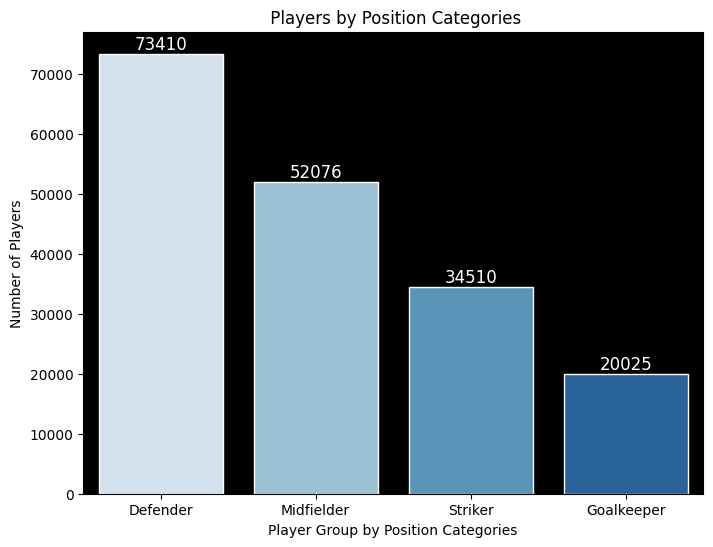

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a black background figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('black')  # Set the background color to black

# Calculate the counts of each category
count_data = fifa['position_category'].value_counts()

# Sort the categories in descending order
count_data = count_data.sort_values(ascending=False)

# Use Seaborn to create a count plot with sorted order
sns.set(style="darkgrid")  # Set a dark grid style
ax = sns.countplot(data=fifa, x='position_category', palette='Blues', order=count_data.index)

plt.title(' Players by Position Categories', color='black')
plt.xlabel('Player Group by Position Categories', color='black')
plt.ylabel('Number of Players', color='black')
plt.xticks(rotation=0, color='black')

# Annotate counts on top of the bars as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='white', size=12)

plt.show()


<ipython-input-52-aad0c8a4174f>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues', len(grouped_counts))


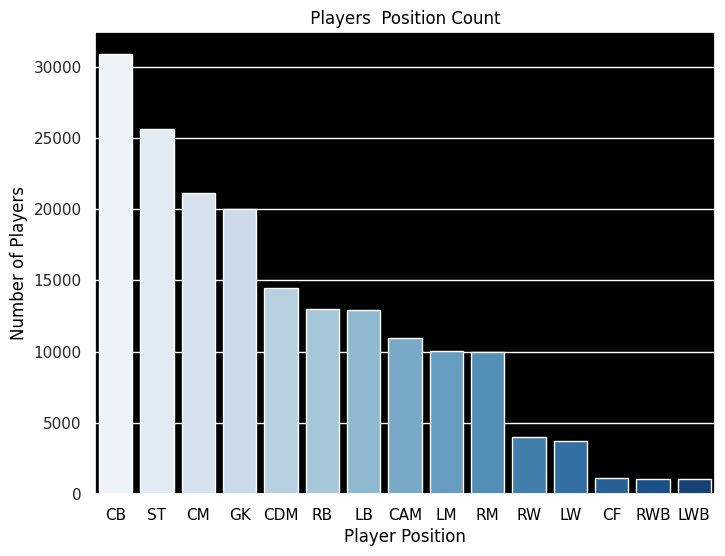

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group the data by 'player_positions' and calculate the count of each group
grouped_counts = fifa['player_positions'].value_counts()

# Sort the categories in descending order
grouped_counts = grouped_counts.sort_values(ascending=False)

# Create a custom color map
colors = plt.cm.get_cmap('Blues', len(grouped_counts))

# Create a black background figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('black')  # Set the background color to black

# Use Seaborn to create a count plot with sorted order
sns.set(style="darkgrid")  # Set a dark grid style
ax = sns.countplot(data=fifa, x='player_positions', palette='Blues', order=grouped_counts.index)

plt.title(' Players  Position Count ', color='black')
plt.xlabel('Player Position', color='black')
plt.ylabel('Number of Players', color='black')
plt.xticks(rotation=0, color='black')

# Annotate counts slightly above the bars

plt.show()


function to perform the numerics

In [53]:
def extract_numeric(value):
    try:
        if '+' in str(value):
            operations = str(value).replace('+', '-').split('-')
            total = int(operations[0])
            for operation in operations[1:]:
                total += int(operation)
            return total
        elif '-' in str(value):
            operations = str(value).split('-')
            total = int(operations[0])
            for operation in operations[1:]:
                total -= int(operation)
            return total
        else:
            return int(value)
    except ValueError:
        return value  # H
# Apply the function to each cell in the specified columns
fifa = fifa.applymap(extract_numeric)

In [54]:
fifa.head(10)

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,club_position,club_jersey_number,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,position_category
0,231747,24,K. Mbappé,Kylian Mbappé Lottin,ST,91,94,181500000,230000,24,182,75,Paris Saint Germain,Ligue 1,LW,7.0,2024.0,18,France,Right,4,5,5,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,93,93,93,91,91,91,91,91,92,92,92,92,84,84,84,92,71,66,66,66,71,66,57,57,57,66,21,Striker
1,239085,24,E. Haaland,Erling Braut Haaland,ST,91,94,185000000,340000,22,195,94,Manchester City,Premier League,ST,9.0,2027.0,36,Norway,Left,3,3,5,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,93,93,93,82,86,86,86,82,85,85,85,82,77,77,77,82,65,66,66,66,65,63,65,65,65,63,22,Striker
2,192985,24,K. De Bruyne,Kevin De Bruyne,CM,91,91,103000000,350000,32,181,75,Manchester City,Premier League,SUB,17.0,2025.0,7,Belgium,Right,5,4,5,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,86,86,86,87,88,88,88,87,91,91,91,91,91,91,91,91,82,83,83,83,82,78,73,73,73,78,24,Midfielder
3,158023,24,L. Messi,Lionel Andrés Messi Cuccittini,CF,90,90,41000000,23000,36,169,67,Inter Miami,Major League Soccer,RF,10.0,2025.0,52,Argentina,Left,4,4,5,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,88,88,88,90,89,89,89,90,90,90,90,90,88,88,88,90,67,66,66,66,67,62,52,52,52,62,22,Striker
4,165153,24,K. Benzema,Karim Benzema,CF,90,90,51000000,95000,35,185,81,Al Ittihad,Pro League,RS,9.0,2026.0,18,France,Right,4,4,5,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,90,90,90,86,89,89,89,86,90,90,90,89,85,85,85,89,67,67,67,67,67,63,58,58,58,63,21,Striker
5,188545,24,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000,340000,34,185,81,FC Barcelona,La Liga,ST,9.0,2026.0,37,Poland,Right,4,4,5,75,91,80,87,44,84,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,90,90,90,85,88,88,88,85,89,89,89,87,83,83,83,87,68,69,69,69,68,64,64,64,64,64,22,Striker
6,192119,24,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,63000000,250000,31,199,96,Real Madrid,La Liga,SUB,1.0,2026.0,7,Belgium,Left,3,1,5,80,80,79,83,53,77,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,35,35,35,30,31,31,31,30,35,35,35,34,36,36,36,34,32,34,34,34,32,32,32,32,32,32,90,Goalkeeper
7,202126,24,H. Kane,Harry Kane,ST,90,90,119500000,170000,29,188,85,FC Bayern München,Bundesliga,ST,9.0,2027.0,14,United Kingdom,Right,5,3,5,69,93,84,83,49,83,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,90,90,90,84,87,87,87,84,89,89,89,88,86,86,86,88,70,72,72,72,70,67,66,66,66,67,23,Striker
8,238794,24,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,158500000,310000,22,176,73,Real Madrid,La Liga,SUB,7.0,2025.0,54,Brazil,Right,4,5,5,95,82,78,90,29,68,78,89,50,80,72,92,77,62,77,90,95,95,94,86,84,76,74,84,64,85,85,85,88,86,86,86,88,89,89,89,89,81,81,81,89,65,61,61,61,65,60,48,48,48,60,19,Striker
9,212831,24,Alisson,Alisson Ramsés Becker,GK,89,90,77500000,180000,30,193,91,Liverpool,Premier League,GK,1.0,2027.0,54,Brazil,Right,3,1,5,76,75,77,82,59,76,17,13,29,60,20,27,19,18,58,42,60,49,40,87,37,64,82,32,78,42,42,42,39,42,42,42,39,48,48,48,45,49,49,49,45,37,42,42,42,37,36,36,36,36,36,90,Goalkeeper


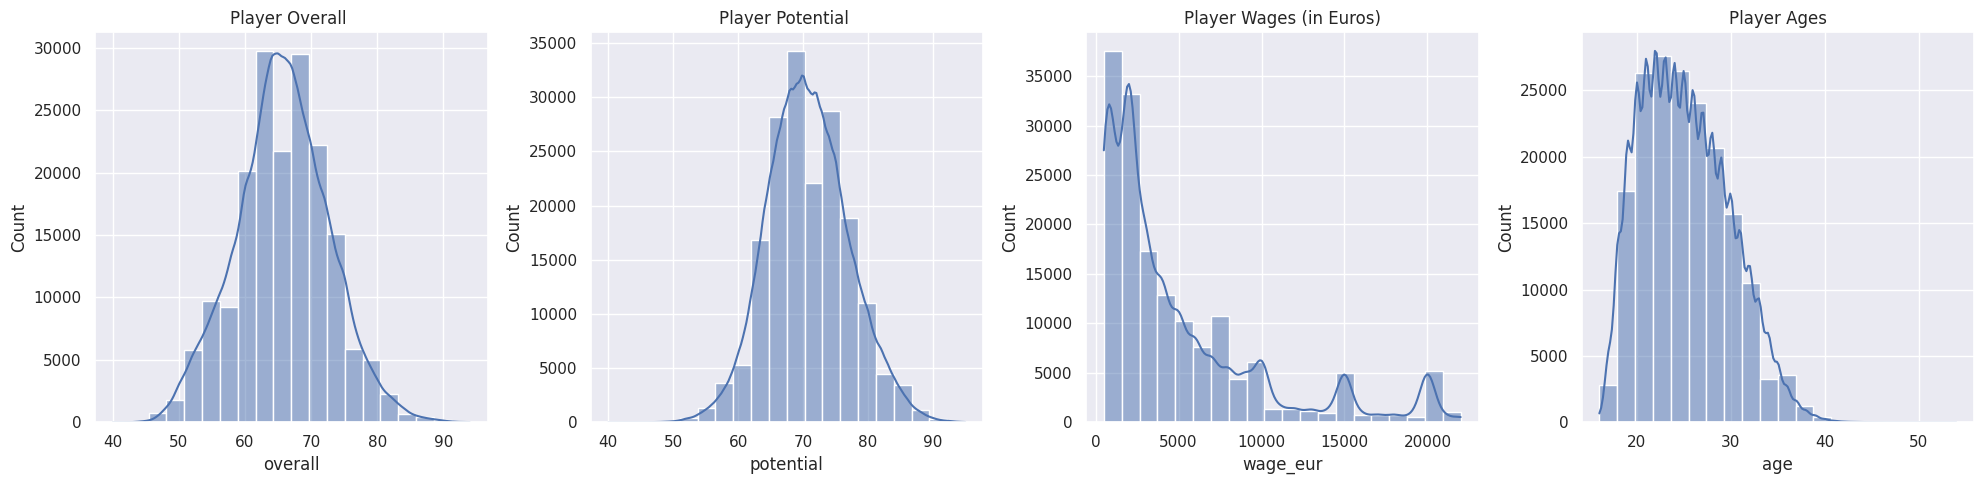

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Histogram for 'overall' column
sns.histplot(fifa['overall'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Player Overall ')

# Histogram for 'potential' column
sns.histplot(fifa['potential'], kde=True, bins=20, ax=axes[1])
axes[1].set_title('Player Potential ')

# Histogram for 'wage_eur' column
#custom_bins = range(10000, int(fifa['wage_eur'].max()) + 50000, 5000)
#sns.histplot(fifa['wage_eur'], kde=True, bins=custom_bins, ax=axes[2])
#axes[2].set_title('Player Wages (in Euros)')
#quantiles = [0, 0.25, 0.5, 0.75, 1]
#wage_bin_edges = np.quantile(fifa['wage_eur'], quantiles)
# Calculate the IQR (Interquartile Range) for 'wage_eur'
Q1 = fifa['wage_eur'].quantile(0.25)
Q3 = fifa['wage_eur'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to exclude outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers in 'wage_eur'
filtered_wages = fifa[(fifa['wage_eur'] >= lower_bound) & (fifa['wage_eur'] <= upper_bound)]

# Histogram for 'wage_eur' without outliers
sns.histplot(filtered_wages['wage_eur'], kde=True, bins=20, ax=axes[2])
axes[2].set_title('Player Wages (in Euros)')


# Histogram for 'age' column
sns.histplot(fifa['age'], kde=True, bins=20, ax=axes[3])
axes[3].set_title('Player Ages')

# Adjust layout
plt.tight_layout()
plt.show()


In [56]:
fifa.to_csv('male_players_cleaned.csv', index=False)

In [57]:
# Move the file to the desired location using the !mv command
!mv male_players_cleaned.csv /content/gdrive/Shareddrives/Data\ 230/dataset_10years/


mv: 'male_players_cleaned.csv' and '/content/gdrive/Shareddrives/Data 230/dataset_10years/male_players_cleaned.csv' are the same file


In [58]:
from google.colab import files
files.download('male_players_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modeling


### Save file with important features

In [ ]:
fifa24 = fifa[fifa['fifa_version'] == 24]

In [ ]:
fifa24 = fifa24.dropna(how='any',axis=0)

In [ ]:
round((fifa24.isna().sum()/len(fifa24) ) * 100).sort_values(ascending=False)

In [ ]:
fifa24.columns

Index(['player_id', 'fifa_version', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'club_position', 'club_jersey_number', 'club_contract_valid_until_year',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'ca

In [ ]:
fifa24 = fifa24[['player_positions', 'overall', 'potential', 'value_eur',
       'age', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength']]

In [ ]:
fifa24.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16698 entries, 77 to 18349
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player_positions            16698 non-null  object 
 1   overall                     16698 non-null  int64  
 2   potential                   16698 non-null  int64  
 3   value_eur                   16698 non-null  int64  
 4   age                         16698 non-null  int64  
 5   height_cm                   16698 non-null  int64  
 6   weight_kg                   16698 non-null  int64  
 7   weak_foot                   16698 non-null  int64  
 8   skill_moves                 16698 non-null  int64  
 9   international_reputation    16698 non-null  int64  
 10  pace                        16698 non-null  float64
 11  shooting                    16698 non-null  float64
 12  passing                     16698 non-null  float64
 13  dribbling                   16

In [ ]:
fifa24.to_csv('fifa24_modeling.csv', index=False)
#!cp fifa24_modeling.csv "/content/gdrive/Shareddrives/Data 230/dataset_10years/"

### Modeling

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
fifa24 = pd.read_csv('/content/gdrive/Shareddrives/Data 230/dataset_10years/fifa24_modeling.csv')
fifa24.head()

,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength
0,GK,85,85,6000000,36,185,80,3,1,3,71.0,34.0,57.0,64.0,88.0,73.0,11,15,11,40,11,24,21,15,37,30,54,53,60,80,61,56,73,39,75
1,GK,81,81,2900000,37,185,78,3,1,1,59.0,62.0,69.0,67.0,70.0,75.0,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,68,38,60
2,CB,81,81,4600000,37,190,82,3,2,3,36.0,41.0,62.0,63.0,85.0,68.0,38,27,77,74,31,59,53,45,72,72,39,33,44,83,50,65,74,33,79
3,GK,81,81,2900000,36,189,89,3,1,3,59.0,62.0,69.0,67.0,70.0,75.0,18,12,16,40,15,12,13,15,49,40,42,49,60,81,47,59,65,34,63
4,GK,81,81,2900000,35,190,84,2,1,3,59.0,62.0,69.0,67.0,70.0,75.0,12,12,11,34,16,20,10,16,32,25,53,57,61,76,54,58,73,45,77


In [ ]:
fifa24 = fifa24.drop(['player_positions', 'weak_foot', 'skill_moves', 'international_reputation'],axis=1)

In [ ]:
X = fifa24.drop(['value_eur'],axis=1)
y = fifa24[['value_eur']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 13358 Training Data
There are 3340 Testing Data


### XGBoost

In [ ]:
best_model_rs = XGBRegressor(subsample= 0.6, n_estimators= 1000,max_depth= 5, learning_rate= 0.01)
best_model_rs.fit(X_train, y_train)
y_pred = best_model_rs.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f')))
print('R-Square', float(format(r2_score(y_test, y_pred), '.3f')))


Mean Absolute Error: 48406.78179282913
Root Mean Squared Error: 97343.121
R-Square 0.993


In [ ]:
#training results
result = best_model_rs.predict(X_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, result))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_train, result)), '.3f')))
print('R-Square', float(format(r2_score(y_train, result), '.3f')))



Mean Absolute Error: 39656.10336444442
Root Mean Squared Error: 59230.401
R-Square 0.997


### Random Forest

In [ ]:

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f')))
print('R-Square', float(format(r2_score(y_test, y_pred), '.3f')))



<ipython-input-23-fe2b1e375433>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Mean Absolute Error: 36336.78143712575
Root Mean Squared Error: 99286.081
R-Square 0.993


In [ ]:
#training results
result = regressor.predict(X_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, result))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_train, result)), '.3f')))
print('R-Square', float(format(r2_score(y_train, result), '.3f')))

K-Nearest Neighbor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)
#y_pred_knn=knn.predict(X_test)
y_pred=knn.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f')))
print('R-Square', float(format(r2_score(y_test, y_pred), '.3f')))


Mean Absolute Error: 364551.0645375915
Root Mean Squared Error: 631755.558
R-Square 0.709


In [ ]:
#training results
result = knn.predict(X_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, result))
print('Root Mean Squared Error:', float(format(np.sqrt(mean_squared_error(y_train, result)), '.3f')))
print('R-Square', float(format(r2_score(y_train, result), '.3f')))

Mean Absolute Error: 318969.9056745022
Root Mean Squared Error: 533294.116
R-Square 0.781
